<a href="https://colab.research.google.com/github/Vikrant4298/Jamboree-Business-Case---Linear-Regression-/blob/main/Linear_Regression_Vikrant_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jamboree Education - Linear Regression Case Study


#About Data:
Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven problem-solving
methods, they have helped students achieve exceptional scores on exams like GMAT,
GRE, and SAT with minimal effort.

To further support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy
League colleges, considering the unique perspective of Indian applicants.

By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
factors impacting graduate admissions and their interrelationships. Additionally, we
can provide predictive insights to determine an individual’s admission chances based on
various variables.



#Objective:
As a data scientist/ML engineer hired by Jamboree, your primary objective is toanalyze
the given dataset and derive valuable insights from it. Additionally, utilize the dataset to
construct a predictive model capable of estimating an applicant’s likelihood of admission
based on the available features.

Solving this business case holds immense importance for aspiring data scientists and
ML engineers.

Building predictive models using machine learning is widely popular among the data
scientists/ML engineers.
 By working through this case study, individuals gain hands-on
experience and practical skills in the field.


Additionally, it will enhance one’s ability to communicate with the stakeholders involved
in data-related projects and help the organization take better, data-driven decisions.

#Note: Kindly Find the Colab Link To Access the Project


https://colab.research.google.com/drive/1RoBvNfVSEPxLCRzMCPQKj8PQn6L6YzPC?usp=sharing

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv

--2025-02-16 09:13:58--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.58, 18.164.173.110, 18.164.173.117, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2025-02-16 09:13:58 (187 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#1. Making the Columns Perfect

In [ ]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('.', '')
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

#2. Checking for Missing Values & Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate values
print(f"Duplicate Rows: {df.duplicated().sum()}")


Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64
Duplicate Rows: 0


In [ ]:
df.nunique()

,0
Serial_No,500
GRE_Score,49
TOEFL_Score,29
University_Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance_of_Admit,61


#3. Droping the unique column here it is Serial_No

In [ ]:
df.drop('Serial_No', axis=1, inplace=True)

In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [ ]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.721760
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.141087
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.345000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'CGPA_Category'],
      dtype='object')

#Univariate_Analysis
#Count the total students for each University Rating

In [ ]:
data=df.groupby('University_Rating').size().reset_index(name='Total_Student_Count')

In [ ]:
data=data.sort_values(by='Total_Student_Count', ascending=False).reset_index(drop=True)
data

,University_Rating,Total_Student_Count
0,3,162
1,2,126
2,4,105
3,5,73
4,1,34


Here We can see that University_Rating 3 has highest student count and rating 1 has lowest count

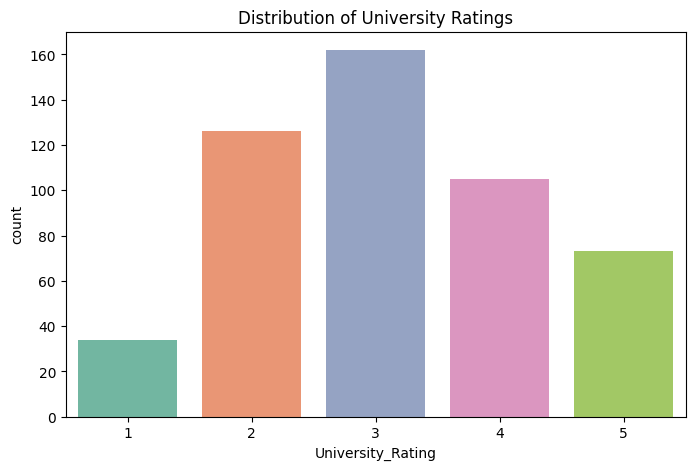

In [ ]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='University_Rating', palette="Set2")
plt.title("Distribution of University Ratings")
plt.show()

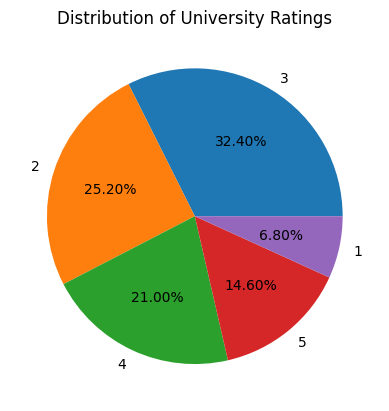

In [ ]:
plt.pie(data=data, x='Total_Student_Count', labels='University_Rating', autopct='%.2f%%')
plt.title("Distribution of University Ratings")
plt.show()

In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65



#A. Continuous Variables (GRE, TOEFL, CGPA, Chance_of_Admit)

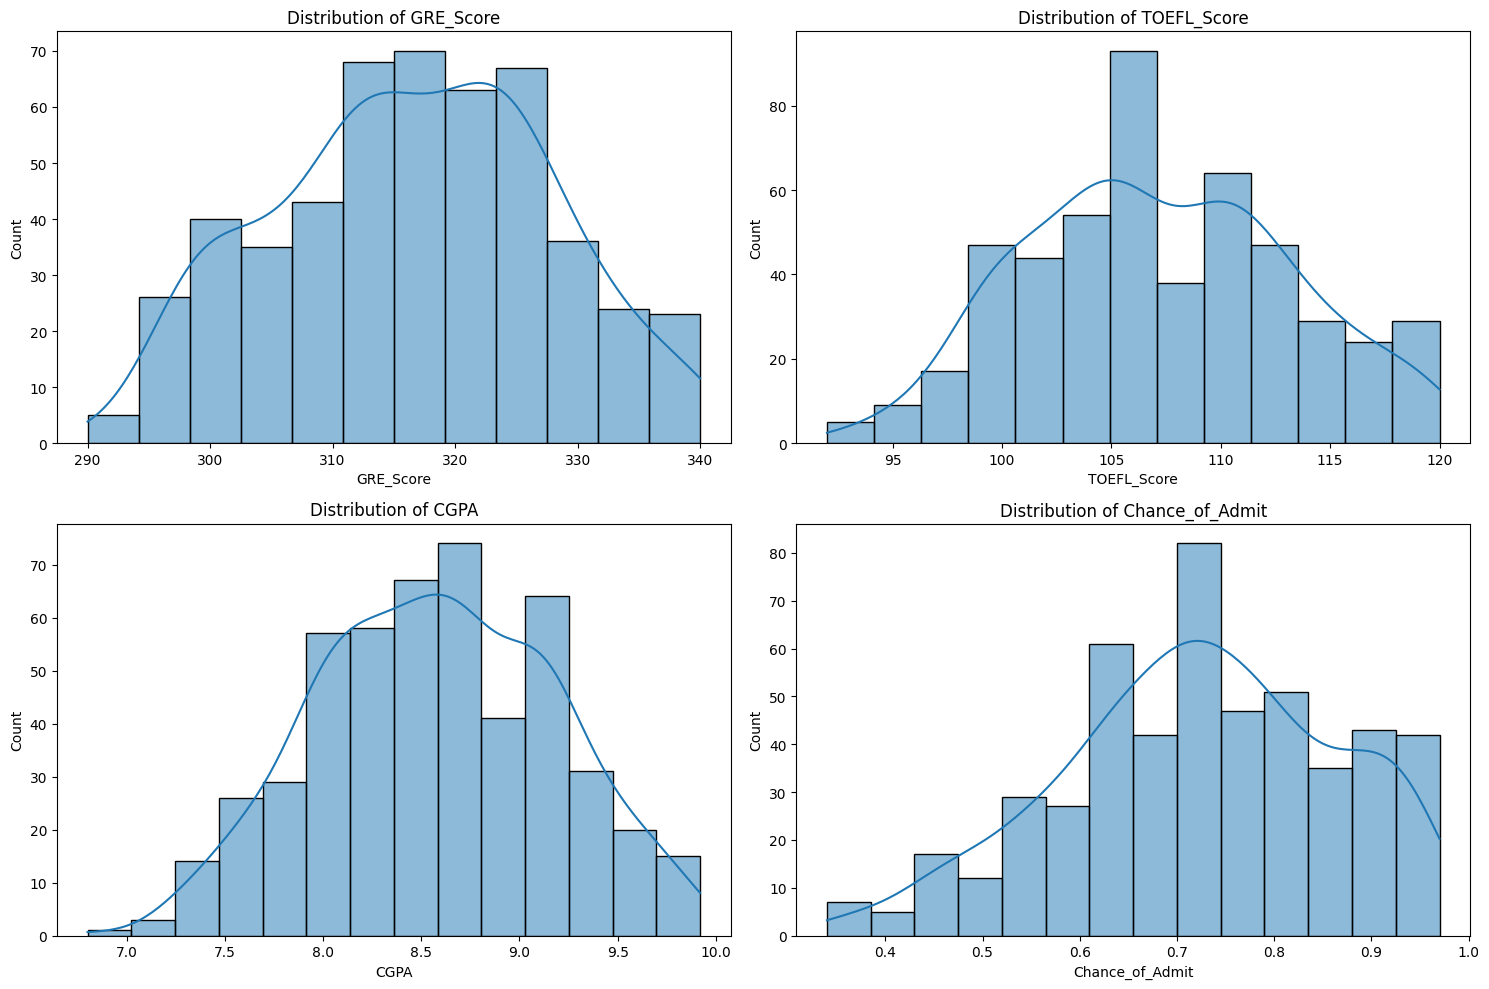

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_vars = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

plt.figure(figsize=(15,10))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

#Key Insights:

GRE Scores concentrated between 305-330

TOEFL Scores mostly between 100-115

CGPA distribution shows most students > 8.0

Chance_of_Admit is left-skewed

#B. Categorical Variables (University_Rating, SOP, LOR, Research)

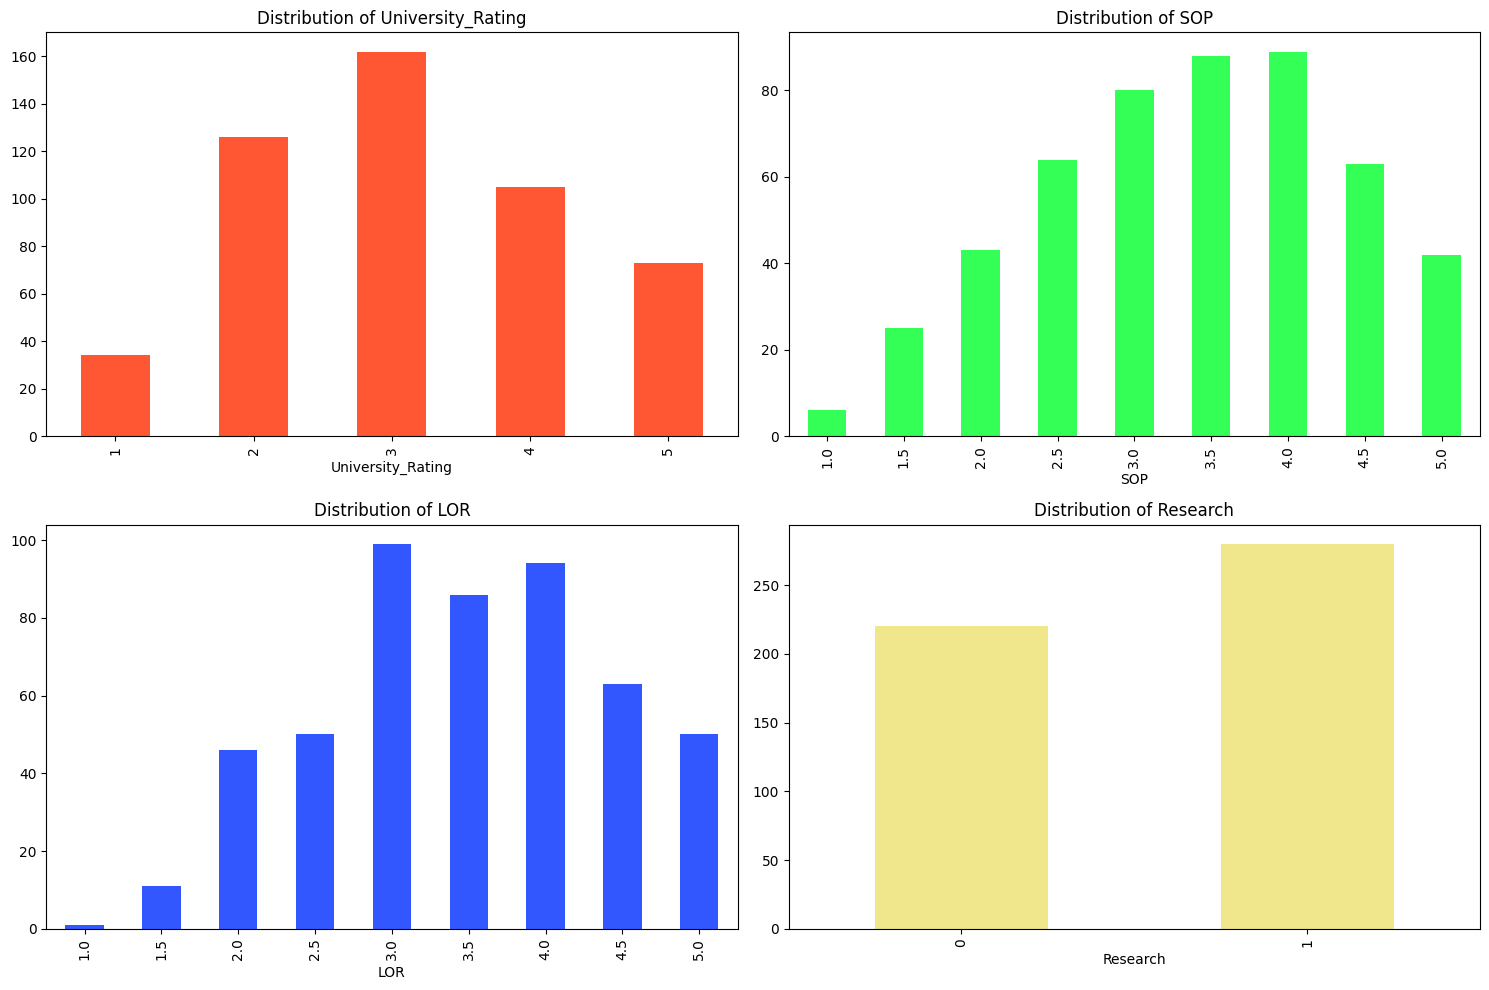

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_vars = ['University_Rating', 'SOP', 'LOR', 'Research']
colors = ['#FF5733', '#33FF57', '#3357FF', '#F0E68C']  # Custom colors
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().sort_index().plot(kind='bar', color=colors[i-1])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


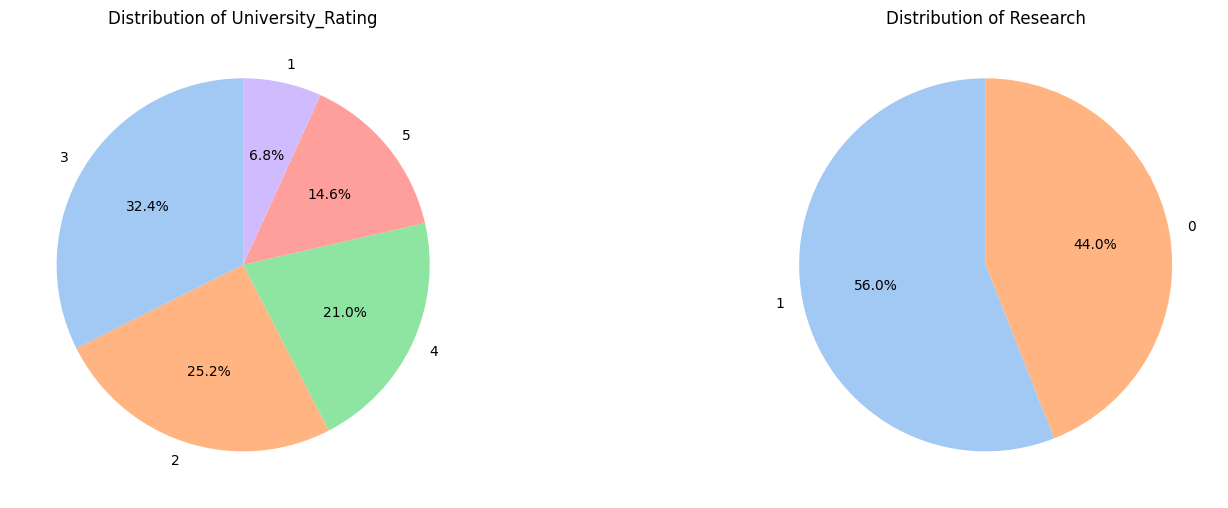

In [ ]:
cat_vars = ['University_Rating', 'Research']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_vars, 1):
    plt.subplot(2, 2, i)
    values = df[col].value_counts()
    labels = values.index  # Unique categories
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


#Key Insights:
     University with rating 3 has highest count
     In Research 56% have research experience

#Checking For Outliers

In [ ]:
cont_vars = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

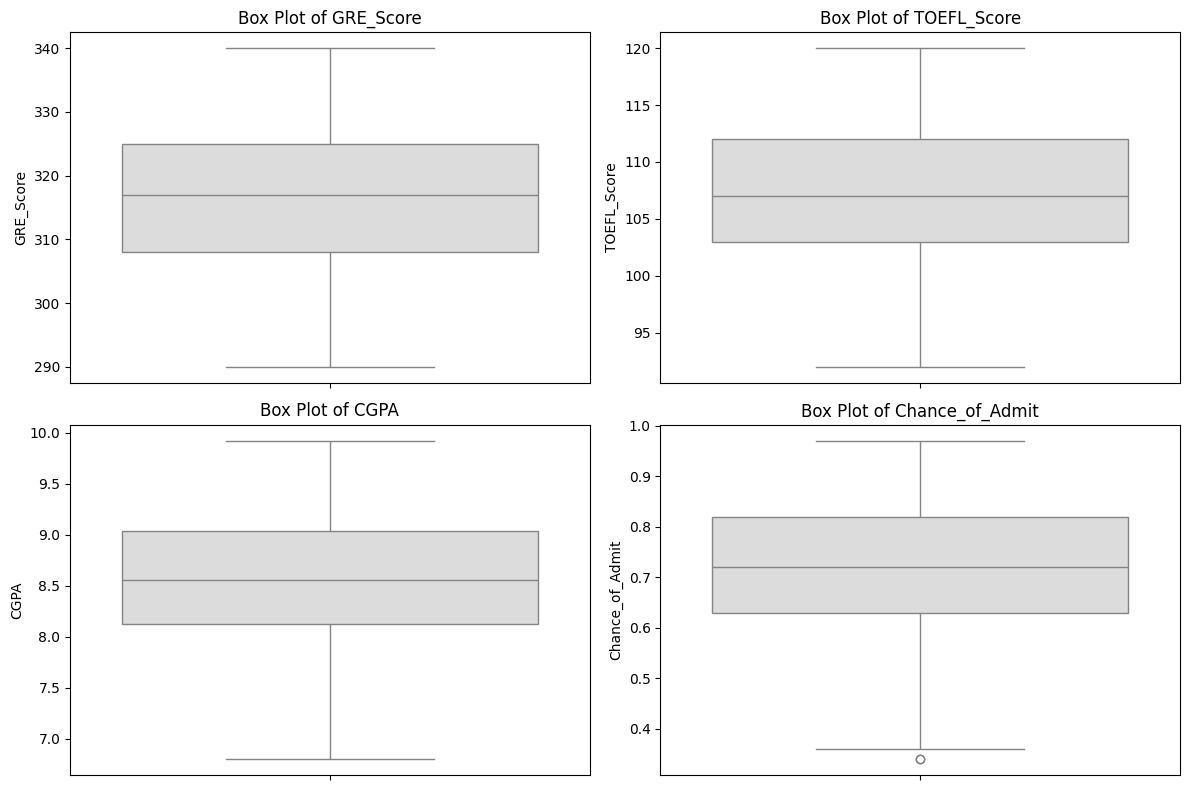

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_vars = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.boxplot(y=df[col], palette="coolwarm")  # Using y-axis for better visualization
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
cont_vars = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'Chance_of_Admit']

for col in cont_vars:
    Q1 = df[col].quantile(0.25)  # First Quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third Quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower Whisker
    upper_bound = Q3 + 1.5 * IQR  # Upper Whisker

    # Replace outliers with the respective bounds
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

print("Outliers handled successfully!")


Outliers handled successfully!


#Bivariate Analysis
#A. Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

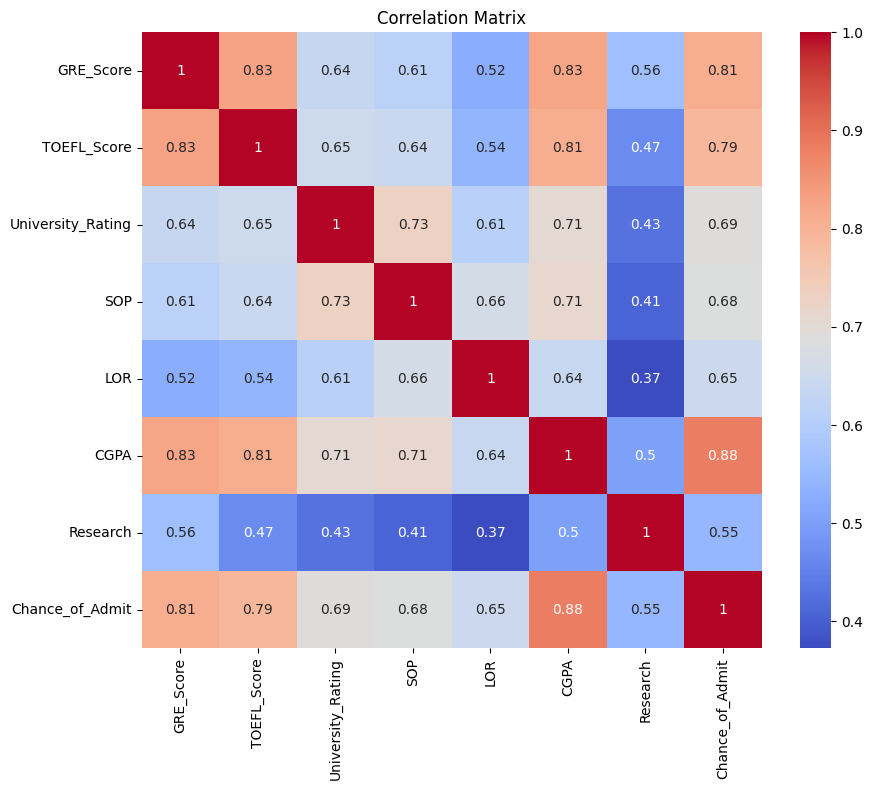

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

#Key Insights:
#There is no such pair where correlation>=.90 so we can not drop any features as they are not highly corelated

#B. Target vs Continuous Features

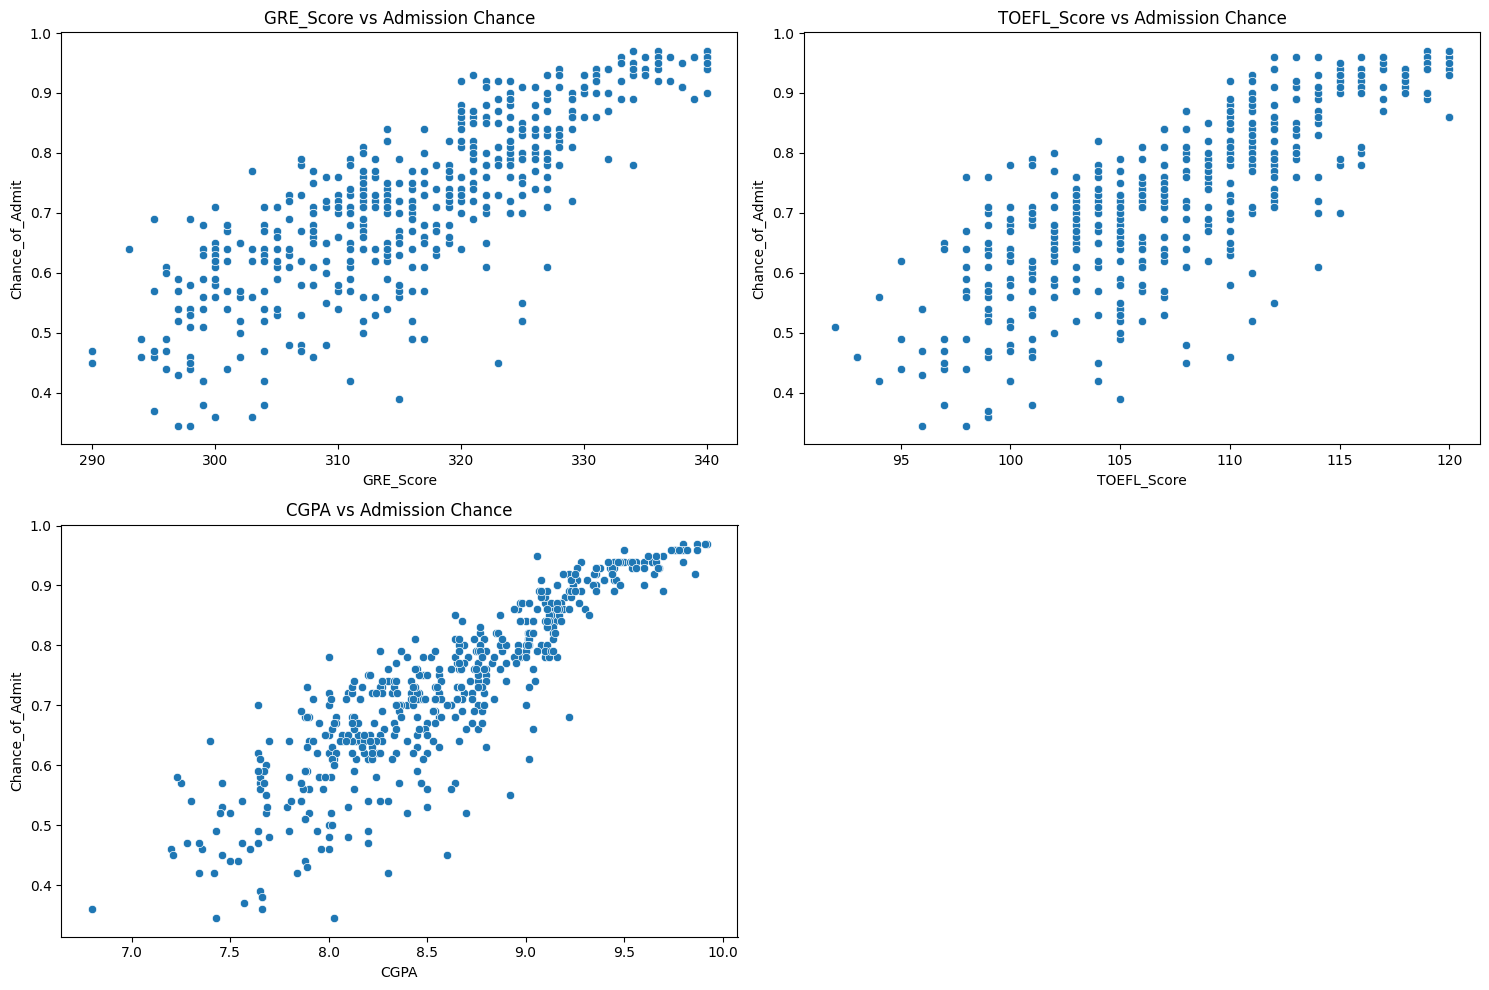

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['GRE_Score', 'TOEFL_Score', 'CGPA'], 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=df[col], y=df['Chance_of_Admit'])
    plt.title(f'{col} vs Admission Chance')
plt.tight_layout()

#Key Insights:

Clear positive linear relationships

Higher scores → Higher admission chances

CGPA shows strongest relationship

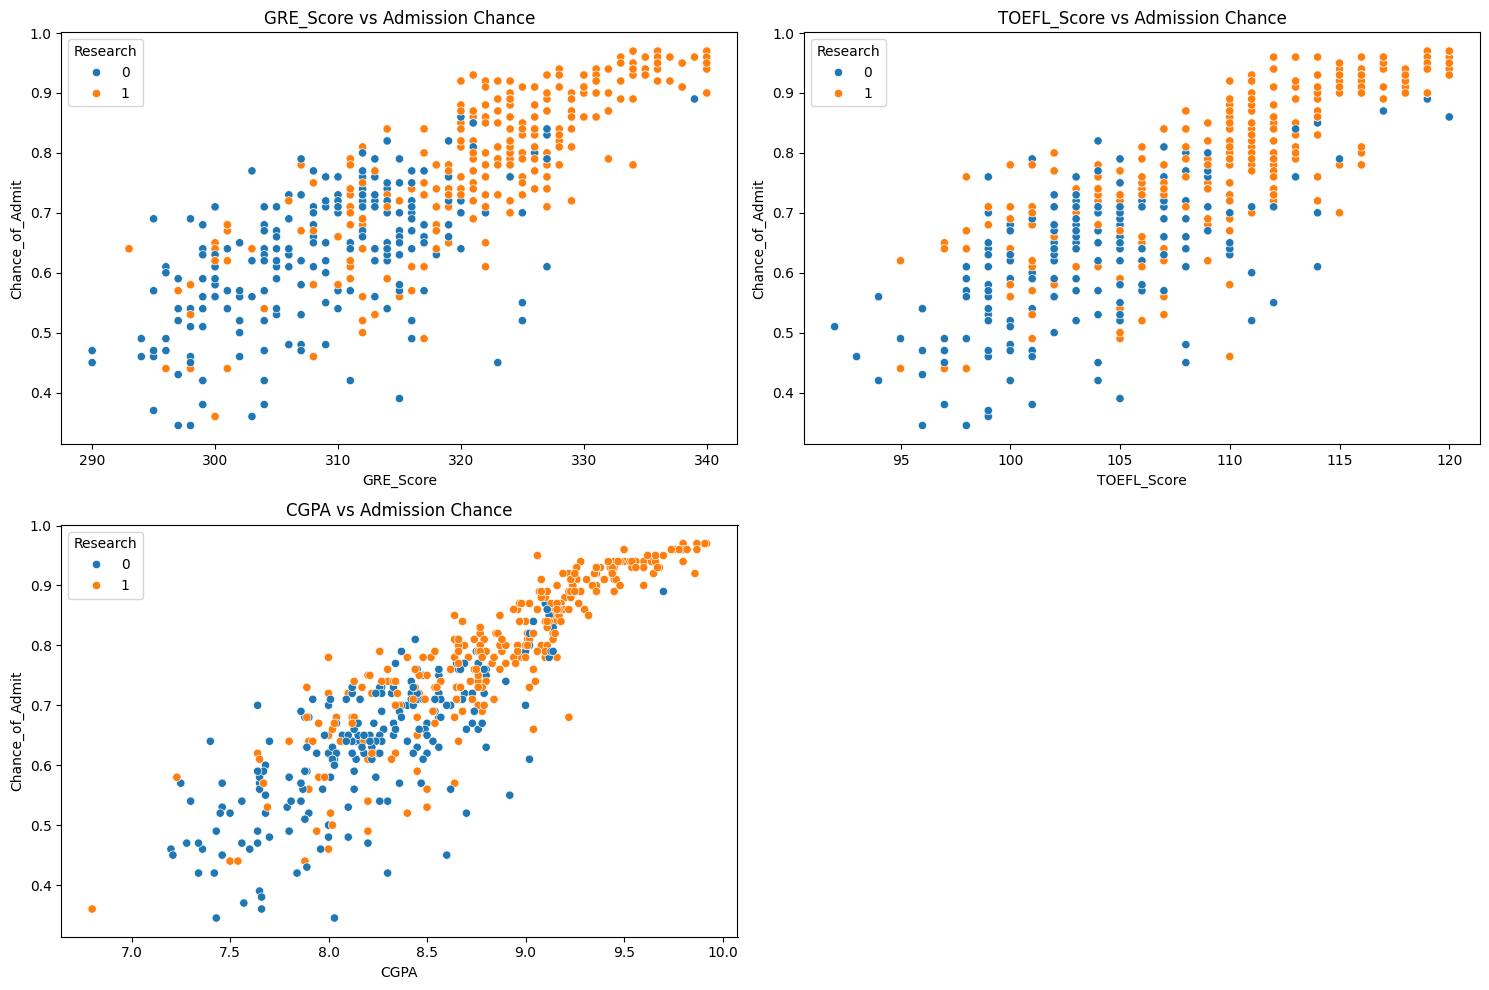

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['GRE_Score', 'TOEFL_Score', 'CGPA'], 1):
    plt.subplot(2,2,i)
    sns.scatterplot(x=df[col], y=df['Chance_of_Admit'], hue=df['Research'])
    plt.title(f'{col} vs Admission Chance')
plt.tight_layout()

#Key Insights:
Students with higher chance of admission always publish the resarch papers

#C. Target vs Categorical Features

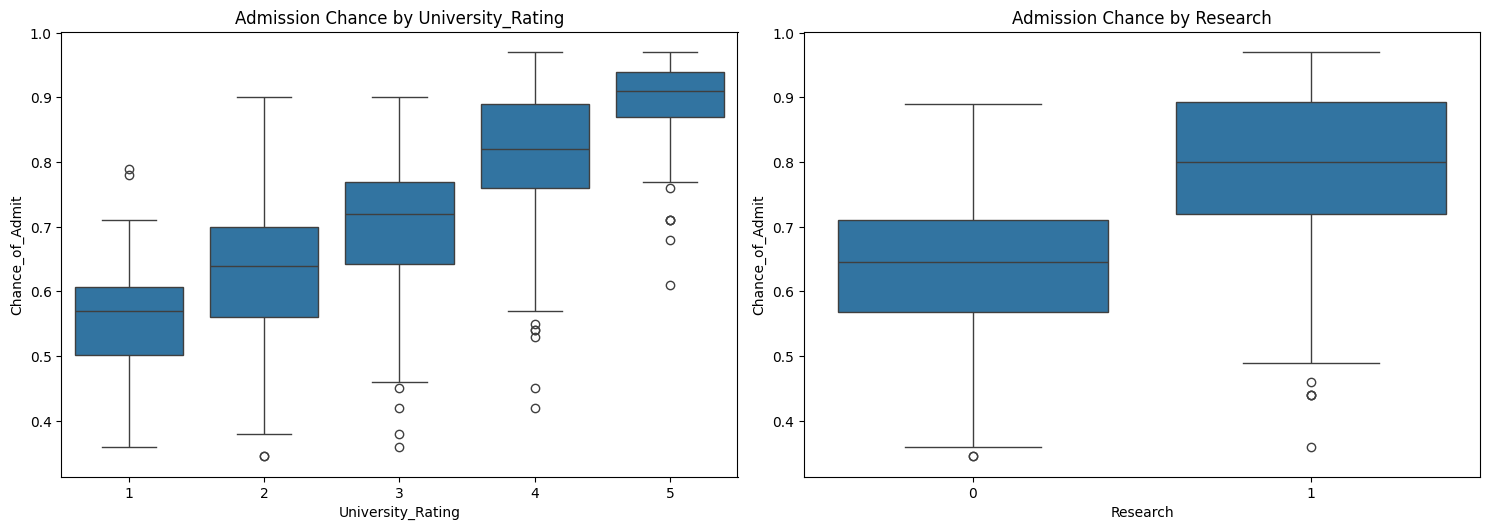

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col], y=df['Chance_of_Admit'])
    plt.title(f'Admission Chance by {col}')
plt.tight_layout()

#Key Insights:

Higher university ratings → Higher admission chances

Better SOP/LOR scores improve chances

Research experience boosts median chance by ~15%

#4. Advanced Insights
A. CGPA Segmentation

<Axes: xlabel='CGPA_Category', ylabel='Chance_of_Admit'>

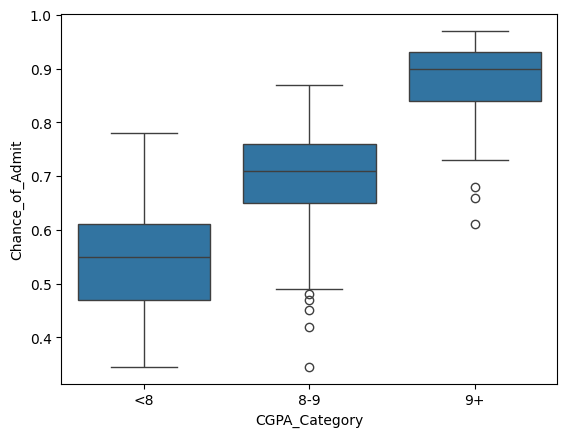

In [ ]:
bins = [0, 8.0, 9.0, 10]
labels = ['<8', '8-9', '9+']
df['CGPA_Category'] = pd.cut(df['CGPA'], bins=bins, labels=labels)

sns.boxplot(x='CGPA_Category', y='Chance_of_Admit', data=df)

#Key Insight:
Here we can see if the CGPA is more chance of getting Admission is high

#B. Research Impact Analysis

In [ ]:
research_impact = df.groupby('Research')['Chance_of_Admit'].mean()*100
print(research_impact)

Research
0    63.495455
1    78.996429
Name: Chance_of_Admit, dtype: float64


#Key Insights:

With Research: 78

Without Research: 63

In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,CGPA_Category
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92,9+
1,324.0,107.0,4,4.0,4.5,8.87,1,0.76,8-9
2,316.0,104.0,3,3.0,3.5,8.00,1,0.72,<8
3,322.0,110.0,3,3.5,2.5,8.67,1,0.80,8-9
4,314.0,103.0,2,2.0,3.0,8.21,0,0.65,8-9


In [ ]:
df_new=df.drop(columns='CGPA_Category')

In [ ]:
df_new.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4,4.0,4.5,8.87,1,0.76
2,316.0,104.0,3,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [ ]:
X=df_new.drop(columns='Chance_of_Admit')

In [ ]:
Y=df_new[['Chance_of_Admit']]

In [ ]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4,4.5,4.5,9.65,1
1,324.0,107.0,4,4.0,4.5,8.87,1
2,316.0,104.0,3,3.0,3.5,8.00,1
3,322.0,110.0,3,3.5,2.5,8.67,1
4,314.0,103.0,2,2.0,3.0,8.21,0


In [ ]:
Y.head()

,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((400, 7), (100, 7))

In [ ]:
y_train.shape, y_test.shape

((400, 1), (100, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_new, columns=x_train.columns)

In [ ]:
x_new=scaler.transform(x_test)
x_test=pd.DataFrame(x_new, columns=x_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([[0.02664015, 0.018191  , 0.00293201, 0.00185611, 0.01583785,
        0.06757604, 0.01193456]])

In [ ]:
model.intercept_

array([0.7242])

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

#Checking For MSE, RMSE, Adjusted R2, R2 on Train and Test Data

#R2 Score:
#r2 Score Train

In [ ]:
train_predict=model.predict(x_train)

In [ ]:
r2_train=r2_score(y_train.values,train_predict)
r2_train

0.8213379717854047

In [ ]:
output=model.predict(x_test)

#r2 Score Test

In [ ]:
test_predict=model.predict(x_test)

In [ ]:
r2_test=r2_score(y_test.values,test_predict)
r2_test

0.8188966188466036

#Adjusted r2 Score Train

In [ ]:
def adj_r(r2_train,x_train,y_train):
  adj_r1 = (1 - ((1-r2_train)*(len(y_train)-1))/(len(y_train)-x_train.shape[1]-1) )
  return adj_r1


In [ ]:
adj_r(r2_train,x_train,y_train)

0.8181475784244298

#Adjusted r2 Score Test

In [ ]:
def adj_r(r2_test,x_test,y_test):
  adj_r1 = (1 - ((1-r2_test)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1) )
  return adj_r1
adj_r(r2_test,x_test,y_test)

0.8051170137588451

# Mean_Squared_Error Train and Test

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Compute Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


Train MSE: 0.0035178079901079045
Test MSE: 0.003703564144586958


#Root Mean Squared Error (RMSE)

In [ ]:
# Compute RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.059311111860324325
Test RMSE: 0.060856915339071845


#Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Compute MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")


Train MAE: 0.04250279073460451
Test MAE: 0.04271076037232828


# Statmodels implementation of Linear regression

In [ ]:

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
# Reset index of y_train
# Add intercept again
X_sm = sm.add_constant(X_tr_scaled)
y_train = y_train.reset_index(drop=True)
# Now fit the model
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.7
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          2.40e-146
Time:                        09:14:07   Log-Likelihood:                 573.94
No. Observations:                 400   AIC:                            -1132.
Df Residuals:                     392   BIC:                            -1100.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7222      0.00

#dropping the insignificant variables (University_Rating and SOP), then retraining:

In [ ]:
# Drop non-significant variables based on p-values > 0.05
X_train = X_train.drop(columns=['University_Rating', 'SOP'])
X_test = X_test.drop(columns=['University_Rating', 'SOP'])

# Standardize the updated dataset
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=X_train.columns)

# Add intercept again
X_sm = sm.add_constant(X_tr_scaled)

# Reset index of y_train for alignment
y_train = y_train.reset_index(drop=True)

# Retrain the model
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     381.0
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          1.93e-148
Time:                        09:14:07   Log-Likelihood:                 572.80
No. Observations:                 400   AIC:                            -1134.
Df Residuals:                     394   BIC:                            -1110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7222      0.003    248.040      

#Performance Metrics & Model Evaluation
#Key Performance Metrics:
R-squared: 0.829 → The model explains 82.9% of the variance in Chance_of_Admit.
Adjusted R-squared: 0.826 → Adjusted for predictors, still strong.
F-statistic: 381.0 (p-value = 1.93e-148) → The model is highly significant.
AIC: -1134 (Lower is better)
BIC: -1110
Key Insights:
Model Performance:

The removal of non-significant variables (University_Rating and SOP) did not significantly impact the R² score (previously 0.830 → now 0.829).
The model remains strong, with an Adjusted R² of 0.826, meaning it generalizes well.
Feature Importance (Significant Variables - p < 0.05):

CGPA (coef = 0.0702, p < 0.0001) → Strongest predictor; higher CGPA significantly increases admission chances.
GRE_Score & TOEFL_Score → Both positively influence admission (higher scores increase chances).
LOR & Research → Having strong recommendations and research experience improves admission probability.
Multicollinearity Check:

Condition Number = 4.63 (Low) → No multicollinearity issues.
Residual Analysis (Model Fit):

Durbin-Watson = 1.941 → No significant autocorrelation, meaning residuals are independent.
Jarque-Bera Test (p < 0.0001) → Residuals are not perfectly normal, indicating potential slight skewness.

#Final Conclusion:
✅ The model is robust, significant, and well-optimized after removing non-significant variables.

✅ CGPA is the most influential factor, followed by GRE, TOEFL, LOR, and Research experience.

✅ The model can be further improved by checking for non-linearity or trying polynomial regression if needed.

Would you like any refinements, such as feature interaction effects? 🚀

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)


In [ ]:
sclr=StandardScaler()

In [ ]:
x_new=sclr.fit_transform(x_train)

In [ ]:
x_train = pd.DataFrame(x_new, columns=x_train.columns)

In [ ]:
x_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
x_new=sclr.transform(x_test)

In [ ]:
x_test=pd.DataFrame(x_new, columns=x_test.columns)

## Test The Assumptions Of Linear Regression.


#Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train, columns=x_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE_Score,4.49
1,TOEFL_Score,3.66
3,SOP,2.79
2,University_Rating,2.57
4,LOR,1.98
6,Research,1.52


#Key Insights:
Since the #**Variance Inflation Factor (VIF)** values for all features are below 5, we can conclude that there is no significant multicollinearity among the independent variables in the dataset. This means that the features do not have a strong linear correlation with each other, ensuring that the regression model can provide reliable and stable coefficient estimates.

Thus, all features can be retained in the model without concerns about redundancy or inflated standard errors due to multicollinearity.

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

array([0.7242])

In [ ]:
x_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


#Normality of Residuals

In [ ]:
y_pred=model.predict(x_train)

In [ ]:
y_pred.shape

(400, 1)

In [ ]:
y_train.shape

(400, 1)

In [ ]:
err = y_train - y_pred

In [ ]:
err.columns

Index(['Chance_of_Admit'], dtype='object')

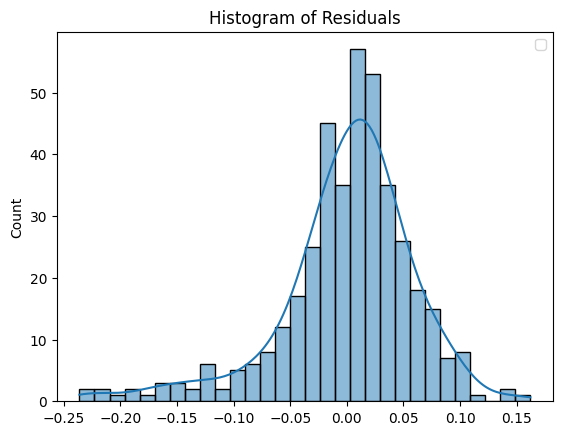

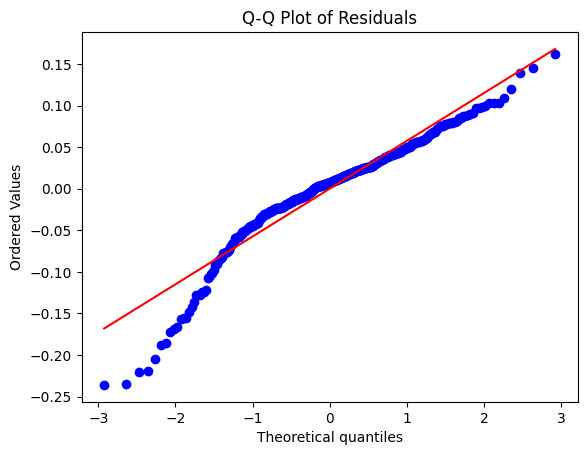

Shapiro-Wilk Test p-value: 8.717924807601946e-13
Residuals are NOT normally distributed (Reject H₀)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Plot Histogram with KDE
sns.histplot(err, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.legend()
plt.show()

# Q-Q Plot
stats.probplot(err['Chance_of_Admit'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test
stat, p_value = shapiro(err)
print(f"Shapiro-Wilk Test p-value: {p_value}")

if p_value > 0.05:
    print("Residuals are normally distributed (Fail to reject H₀)")
else:
    print("Residuals are NOT normally distributed (Reject H₀)")


#Mean Value of Residual

In [ ]:
print(f'Mean Value of Residual : {np.mean(err)}')

Mean Value of Residual : -1.4710455076283325e-17


In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,CGPA_Category
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92,9+
1,324.0,107.0,4,4.0,4.5,8.87,1,0.76,8-9
2,316.0,104.0,3,3.0,3.5,8.00,1,0.72,<8
3,322.0,110.0,3,3.5,2.5,8.67,1,0.80,8-9
4,314.0,103.0,2,2.0,3.0,8.21,0,0.65,8-9


#Linear relationship between independent & dependent variables
#1. Scatter Plots

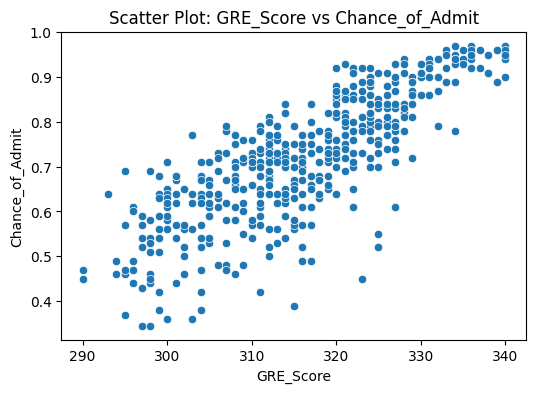

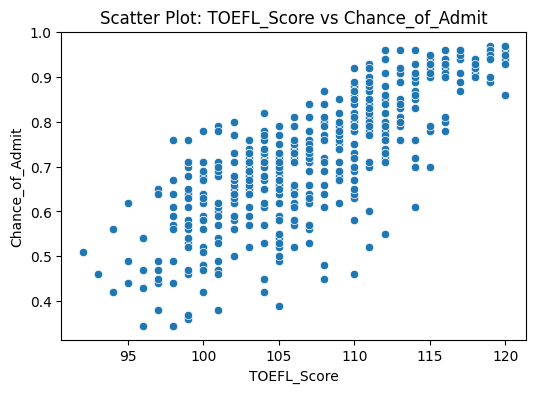

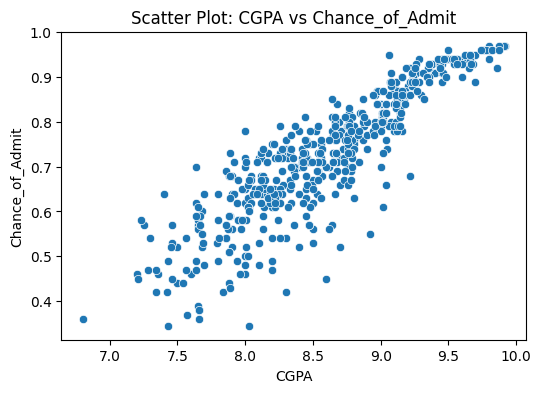

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_var = 'Chance_of_Admit'
features = ['GRE_Score', 'TOEFL_Score', 'CGPA']
# Scatter plots for each independent variable vs target variable
for var in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df[target_var])
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.title(f"Scatter Plot: {var} vs {target_var}")
    plt.show()


#Interpretation:

No strong linear relationship

##2. Regression Plots

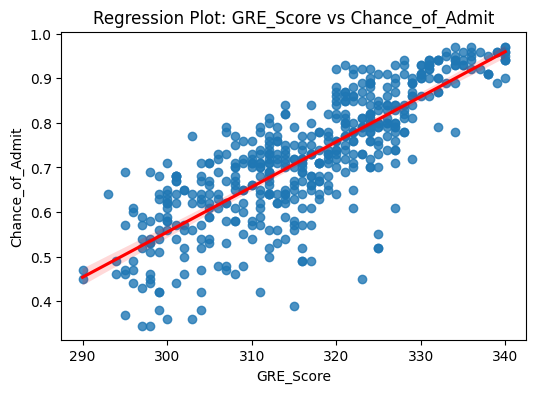

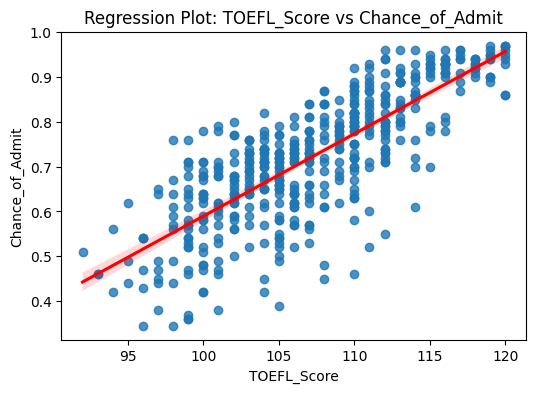

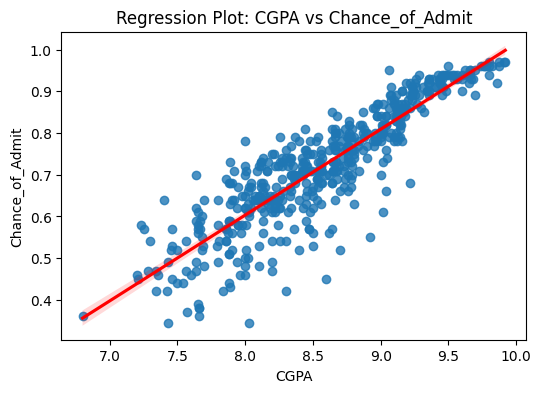

In [ ]:
for var in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[var], y=df[target_var], line_kws={"color": "red"})
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.title(f"Regression Plot: {var} vs {target_var}")
    plt.show()


#Interpretation:
data shows curvature, consider non-linear transformations.

#3. Pearson Correlation

                 Chance_of_Admit  Chance_of_Admit
GRE_Score               0.810421         0.810421
TOEFL_Score             0.792292         0.792292
CGPA                    0.882551         0.882551
Chance_of_Admit         1.000000         1.000000
Chance_of_Admit         1.000000         1.000000


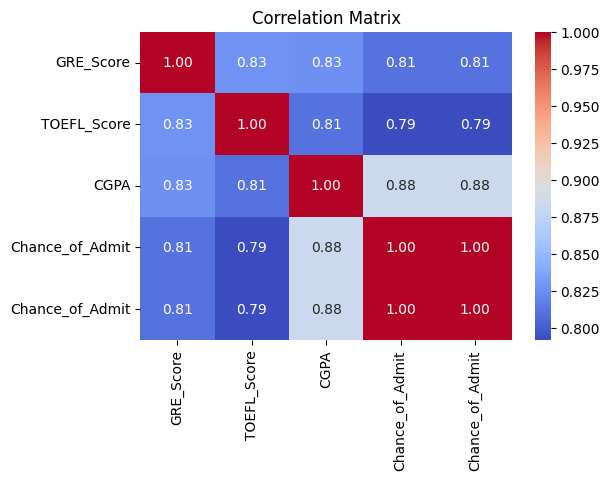

In [ ]:
correlation_matrix = df[cont_vars + [target_var]].corr()
print(correlation_matrix[target_var])  # Correlation with target variable

# Heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Interpretation:

High positive correlation (~0.7 to 1.0) → Strong linear relationship.

Moderate correlation (~0.3 to 0.7) → Some relationship but not strongly linear.

Low correlation (~0.0 to 0.3) → Weak or no linear relationship.

#Checking For Heteroskedasticity

In [ ]:
err.shape

(400, 1)

In [ ]:
y_train.shape

(400, 1)

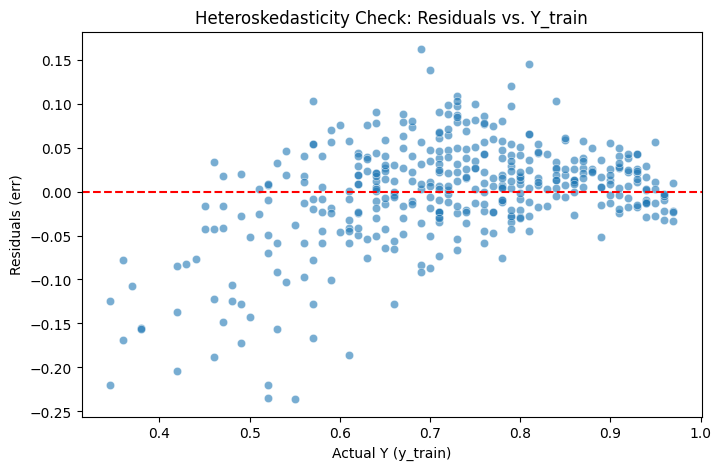

In [ ]:
# Convert DataFrames to Series
y_train = y_train.iloc[:, 0]  # Extract first column
err = err.iloc[:, 0]  # Extract first column

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=err, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line
plt.xlabel("Actual Y (y_train)")
plt.ylabel("Residuals (err)")
plt.title("Heteroskedasticity Check: Residuals vs. Y_train")
plt.show()

#Conclusion on Heteroskedasticity
Since the scatter plot of residuals (err) vs. actual values (y_train) shows a scattered pattern away from the horizontal line (y=0) instead of a random cloud around it, this indicates heteroskedasticity in regression model.

##Lasso and Ridge Regression - L1 & L2 Regularization##

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter (alpha)
alpha = .025  # You can tune this

# Initialize Models
lasso = Lasso(alpha=alpha)
ridge = Ridge(alpha=alpha)

# Train Lasso and Ridge models
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

# Predictions
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

# Performance Evaluation Function
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    train_mse = mean_squared_error(y_true_train, y_pred_train)
    train_r2 = r2_score(y_true_train, y_pred_train)

    test_mse = mean_squared_error(y_true_test, y_pred_test)
    test_r2 = r2_score(y_true_test, y_pred_test)

    print(f"{model_name} Performance:")
    print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    print("-" * 50)

# Evaluate Lasso and Ridge
evaluate_model(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso, "Lasso Regression")
evaluate_model(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge, "Ridge Regression")


Lasso Regression Performance:
Train MSE: 0.0045, Train R²: 0.7725
Test MSE: 0.0045, Test R²: 0.7787
--------------------------------------------------
Ridge Regression Performance:
Train MSE: 0.0035, Train R²: 0.8213
Test MSE: 0.0037, Test R²: 0.8189
--------------------------------------------------


#Business Insights & Recommendations
#Insights:
• First column was observed as unique row identifier which was dropped and was not required for model building

• University Rating , SOP and LOR strength and research are seems to be discrete random Variables , but also ordinal numeric data.

• All the other features are numeric, ordinal and continuous.

• No null values were present in data.

• No Significant amount of outliers were found in data.sChance of admission(target variable)
and GRE score(an independent feature) are nearly normally distribted.

• Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP,
LOR, CGPA, Research

• Target/Dependent Variable : Chance of Admit (the value we want to predict)

• From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very
high correlation with Change of admission.

• University rating, SOP ,LOR and Research have comparatively slightly less correlated than
other features.

• Chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers
or missleading data in column).

• Range of GRE score looks like between 290 to 340.

• Range of TOEFL score is between 92 to 120


• University rating , SOP and LOR are distributed between range of 1 to 5.

• CGPA range is between 6.8 to 9.92.

• From boxplots (distribution of chance of admition (probability of getting admition) as per
GRE score ) : with higher GRE score , there is high probability of getting an admission.

• Students having high toefl score , has higher probability of getting admission.

• From count plots, we can observe , statement of purpose SOP strength is positively correlated
with Chance of Admission.

• We can also similar pattern in Letter of Recommendation Stength and University rating ,
have positive correlation with Chaces of Admission.

• Student having research has higher chances of Admission , but also we can observe some
outliers within that category.

#Model Predictors:

Our analysis identified several key predictors strongly correlated with admission chances.

Notably, GRE score, TOEFL score, and CGPA emerged as significant factors
influencing admission probabilities.

#Multicollinearity Check:

Assessing multicollinearity revealed no significant issues, indicating the robustness of
our model despite high correlations among predictors.

Model Performance: Both Linear Regression and Ridge Regression models exhibited
promising performance, capturing up to approximentally 82% of the variance in admission probabilities.

Data Distribution: Exploratory data analysis uncovered left-skewed distributions in
admission probabilities and strong positive correlations between exam scores and admission chances.

# Recommendations:
#Feature Enhancement:
 Encourage students to focus on improving GRE scores, CGPA,
and the quality of Letters of Recommendation (LOR), as these factors significantly
influence admission chances.

#Data Augmentation:
 Collect a wider range of data beyond academic metrics to capture applicants’ holistic profiles, including extracurricular achievements, personal statements, and diversity factors.
#Additional Features:
 Given the strong correlation among CGPA, we can enrich the
predictive model with additional diverse features such as Research, work experience,
internships, or extracurricular activities.



